In [22]:
import torch
import numpy as np
torch.version.__version__

'1.10.0+cu111'

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#Part1-converting images to tensors
import imageio
image_arr = imageio.imread("/content/drive/MyDrive/Colab Notebooks/ECGR_4106_Homework/Homework1/Images/Blue_image.jpeg")
img = torch.from_numpy(image_arr)
img = img.float()
img =img/255.0
image_1 = img.permute(2,0,1)

image_arr = imageio.imread("/content/drive/MyDrive/Colab Notebooks/ECGR_4106_Homework/Homework1/Images/Green-Wallpaper-29.jpeg")
img = torch.from_numpy(image_arr)
img = img.float()
img =img/255.0
image_2 = img.permute(2,0,1)

image_arr = imageio.imread("/content/drive/MyDrive/Colab Notebooks/ECGR_4106_Homework/Homework1/Images/Red_Photo.jpeg")
img = torch.from_numpy(image_arr)
img = img.float()
img =img/255.0
image_3 = img.permute(2,0,1)

In [25]:
#Calculating the mean to get the brightness
mean1 = torch.mean(image_1)
print(mean1)
mean2 = torch.mean(image_2)
print(mean2)
mean3 = torch.mean(image_3)
print(mean3)



tensor(0.4367)
tensor(0.3618)
tensor(0.1329)


In [26]:
#mean of each channel of images
mean_1 = torch.mean(image_1,(1,2))
print(mean_1)
mean_2 = torch.mean(image_2,(1,2))
print(mean_2)
mean_3 = torch.mean(image_3,(1,2))
print(mean_3)

tensor([0.5306, 0.5316, 0.5333, 0.5328, 0.5340, 0.5344, 0.5355, 0.5353, 0.5344,
        0.5373, 0.5381, 0.5364, 0.5379, 0.5376, 0.5379, 0.5377, 0.5374, 0.5380,
        0.5396, 0.5395, 0.5388, 0.5386, 0.5390, 0.5392, 0.5403, 0.5405, 0.5403,
        0.5390, 0.5390, 0.5387, 0.5384, 0.5392, 0.5395, 0.5393, 0.5386, 0.5389,
        0.5391, 0.5378, 0.5370, 0.5360, 0.5362, 0.5367, 0.5352, 0.5347, 0.5349,
        0.5339, 0.5347, 0.5356, 0.5334, 0.5330, 0.5337, 0.5316, 0.5248, 0.5182,
        0.5136, 0.5081, 0.5007, 0.4966, 0.4937, 0.4894, 0.4873, 0.4863, 0.4844,
        0.4790, 0.4749, 0.4733, 0.4707, 0.4683, 0.4687, 0.4664, 0.4631, 0.4565,
        0.4543, 0.4538, 0.4529, 0.4511, 0.4510, 0.4495, 0.4487, 0.4469, 0.4454,
        0.4449, 0.4437, 0.4403, 0.4398, 0.4381, 0.4354, 0.4334, 0.4318, 0.4305,
        0.4290, 0.4257, 0.4256, 0.4247, 0.4247, 0.4225, 0.4217, 0.4214, 0.4212,
        0.4206, 0.4219, 0.4216, 0.4217, 0.4205, 0.4211, 0.4242, 0.4267, 0.4260,
        0.4302, 0.4335, 0.4330, 0.4331, 

In [27]:
from typing_extensions import ParamSpec
#part2
def model(t_u, w, b):
  return w * t_u + b

def fn_loss(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def fn_dloss(t_p, t_c):
  dsq_diffs = 2*(t_p - t_c) / t_p.size(0)
  return dsq_diffs

def model_dw(t_u, w, b):
  return t_u

def model_db(t_u, w, b):
  return t_u

def model_db(t_u, w, b):
  return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = fn_dloss(t_p, t_c)
  dloss_dw = dloss_dtp * model_dw(t_u, w, b)
  dloss_db = dloss_dtp * model_db(t_u, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])

def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w, b = params
    t_p = model(t_u, w, b)
    loss = fn_loss(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w, b)
    params = params - learning_rate * grad
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params

In [28]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


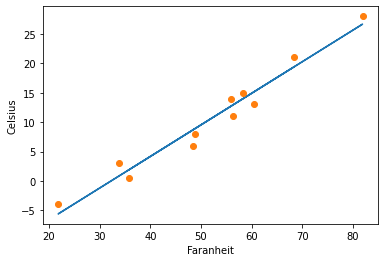

In [29]:
#plotting the datapoints
from matplotlib import pyplot as plt
t_p = model(t_un, *params)
fig = plt.figure()
plt.xlabel("Faranheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [30]:
#Non Linear model functions
def model_non_lin(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b

def dmodel_dw1(t_u, w1, w2, b):
  return t_u

def dmodel_dw2(t_u, w1, w2, b):
  return t_u**2

def dmodel_db_non_lin(t_u, w1, w2, b):
  return 1.0

def grad_fn_non_lin(t_u, t_c, t_p, w1, w2, b):
  dloss_dtp = fn_dloss(t_p, t_c)
  dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
  dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
  dloss_db = dloss_dtp * dmodel_db_non_lin(t_u, w1, w2, b)
  return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])







In [31]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

In [32]:
params.grad is None

True

In [33]:
loss = fn_loss(model_non_lin(t_u, *params), t_c)
loss.backward()

params.grad

tensor([3.6181e+05, 2.3149e+07, 5.9642e+03])

In [34]:
if params.grad is not None:
    params.grad.zero_()

In [35]:
def training_loop_non_lin(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
      params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
      if params.grad is not None:  # <1>
            params.grad.zero_()

      t_p = model_non_lin(t_u, *params)
      loss = fn_loss(t_p, t_c)
      loss.backward()
      grad = grad_fn_non_lin(t_u, t_c, t_p, *params)

      with torch.no_grad():
        params -= learning_rate * grad
      
      if epoch % 500 == 0:
          print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [36]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u


training_loop_non_lin(
    n_epochs = 5000, 
    learning_rate = 1e-3, 
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 500, Loss 675.794373
Epoch 1000, Loss 675.794373
Epoch 1500, Loss 675.794373
Epoch 2000, Loss 675.794373
Epoch 2500, Loss 675.794373
Epoch 3000, Loss 675.794373
Epoch 3500, Loss 675.794373
Epoch 4000, Loss 675.794373
Epoch 4500, Loss 675.794373
Epoch 5000, Loss 675.794373


tensor([ 0.7203, -0.7395, -0.0482], requires_grad=True)

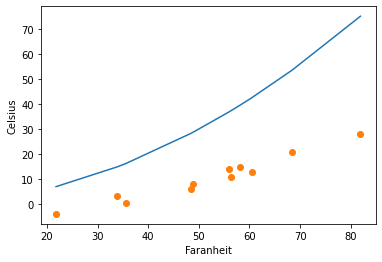

In [37]:
#plotting the datapoints
from matplotlib import pyplot as plt
import numpy as np
t_p = model_non_lin(t_un, *params)
fig = plt.figure()
plt.xlabel("Faranheit")
plt.ylabel("Celsius")
plt.plot(np.sort(t_u.numpy()), np.sort(t_p.detach().numpy()))
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [38]:
#Part3-Housing
import numpy as np
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ECGR_4106_Homework/Homework1/Text_Files/Housing.csv")
housing_df=pd.DataFrame(data)
x_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
y_vars = ['price']
x_df = housing_df[x_vars]
y_df = housing_df[y_vars]


In [39]:
def model (params, x):
  return params[5]*x[:,4] + params[4]*x[:,3] + params[3]*x[:,2]
  + params[2]*x[:,1] + params[1]*x[:,0] + params[0]
def loss_fn (y_p, y):
  squared_diffs = (y_p -y)**2
  return squared_diffs.mean()
def dloss_fn(y_p, y):
  return 2*(y_p-y)/y_p.size(0)
def dmodel_dw4(w,x):
  return x[:,4]
def dmodel_dw3(w,x):
  return x[:,3]
def dmodel_dw2(w,x):
  return x[:,2]
def dmodel_dw1(w,x):
  return x[:,1]
def dmodel_dw0(w,x):
  return x[:,0]
def dmodel_db(params):
  return 1.0
def grad_fn(x,y,y_p,params):
  dloss_dyp = dloss_fn(y_p,y)
  dloss_dw4 = dloss_dyp * dmodel_dw4 (params,x)
  dloss_dw3 = dloss_dyp * dmodel_dw3 (params,x)
  dloss_dw2 = dloss_dyp * dmodel_dw2 (params,x)
  dloss_dw1 = dloss_dyp * dmodel_dw1 (params,x)
  dloss_dw0 = dloss_dyp * dmodel_dw0 (params,x)
  dloss_db = dloss_dyp * dmodel_db(params)
  return torch.stack([dloss_dw4.sum(),dloss_dw3.sum(),dloss_dw2.sum(),dloss_dw1.sum(),dloss_dw0.sum(), dloss_db.sum()])
def training_loop(n_epochs, learning_rate, params, x, y):
  for epoch in range(1, n_epochs+1):
    y_p = model(params,x)
    loss = loss_fn(y_p, y)
    grad = grad_fn(x,y,y_p,params)
    params = params - learning_rate * grad
    if (epoch % 500 == 0):
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params


In [40]:
x = torch.tensor(x_df.values, dtype = torch.float64)
y = torch.tensor(housing_df['price'].values, dtype = torch.float64)

In [41]:
new_x = torch.nn.functional.normalize(x,dim=0)

In [42]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
params = training_loop(5000, 0.1, params, new_x, y)

Epoch 500, Loss 21527365429800.191406
Epoch 1000, Loss 24239310612996.210938
Epoch 1500, Loss 25035541606579.308594
Epoch 2000, Loss 25759972933079.582031
Epoch 2500, Loss 26507710142568.332031
Epoch 3000, Loss 27284465473253.667969
Epoch 3500, Loss 28091680697091.457031
Epoch 4000, Loss 28930642197583.296875
Epoch 4500, Loss 29802681497670.417969
Epoch 5000, Loss 30709187234405.140625


In [43]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
params = training_loop(5000, 0.01, params, new_x, y)

Epoch 500, Loss 15741784735822.912109
Epoch 1000, Loss 12428033335815.000000
Epoch 1500, Loss 12409401062579.669922
Epoch 2000, Loss 13726635608044.496094
Epoch 2500, Loss 15432556481207.373047
Epoch 3000, Loss 17099841900577.794922
Epoch 3500, Loss 18561161190319.906250
Epoch 4000, Loss 19773696249095.710938
Epoch 4500, Loss 20749822946721.109375
Epoch 5000, Loss 21522655898376.820312


In [44]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
params = training_loop(5000, 0.001, params, new_x, y)

Epoch 500, Loss 24670617182547.296875
Epoch 1000, Loss 23256393590196.359375
Epoch 1500, Loss 21965385318737.058594
Epoch 2000, Loss 20789152531848.246094
Epoch 2500, Loss 19719788004187.207031
Epoch 3000, Loss 18749884676565.398438
Epoch 3500, Loss 17872505155088.167969
Epoch 4000, Loss 17081153038719.742188
Epoch 4500, Loss 16369745966574.392578
Epoch 5000, Loss 15732590282670.207031


In [45]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
params = training_loop(5000, 0.0001, params, new_x, y)

Epoch 500, Loss 26053321216475.667969
Epoch 1000, Loss 25893895088920.285156
Epoch 1500, Loss 25735866793431.515625
Epoch 2000, Loss 25579226569093.187500
Epoch 2500, Loss 25423964718025.863281
Epoch 3000, Loss 25270071604993.144531
Epoch 3500, Loss 25117537657010.445312
Epoch 4000, Loss 24966353362956.125000
Epoch 4500, Loss 24816509273185.042969
Epoch 5000, Loss 24667995999144.480469
